In [13]:
import matplotlib.pyplot as plt

import numpy as np

from divisive import div_plot_get_clusters

from maximin import mm_plot_and_get_clusters

from agglomerative import dist_matrix, agg_plot_and_get_clusters

from kmeans import kmeans

from perceptron import Perceptron

def load(infile):
    # Zkontrolovat
    # Načte vektory ze souboru do pole 2D vektorů
    file = open(infile, "rt")
    data = []
    for line in file:
        vector = line.split()
        for i in range(len(vector)):
            const = 0
            if vector[i][0] == "-":
                const = 1
            exp = int(10 * vector[i][10 + const]) + int(vector[i][11 + const])
            mark = vector[i][9 + const]
            vector[i] = float(vector[i][0 + const:8 + const])
            if mark == "+":
                vector[i] = vector[i] * 10 ** exp
            elif mark == "-":
                vector[i] = vector[i] / (10 ** exp)
            vector[i] = round(vector[i], 10)
            if const == 1:
                vector[i] = -1 * vector[i]
        data.append(vector)
    file.close()
    data = np.array(data)
    return data

In [14]:
#Načtení dat
data = load("data.txt")

data = data[::10] #Zmenšení obsahu dat pro rychlejší výpočty

dm = dist_matrix(data)

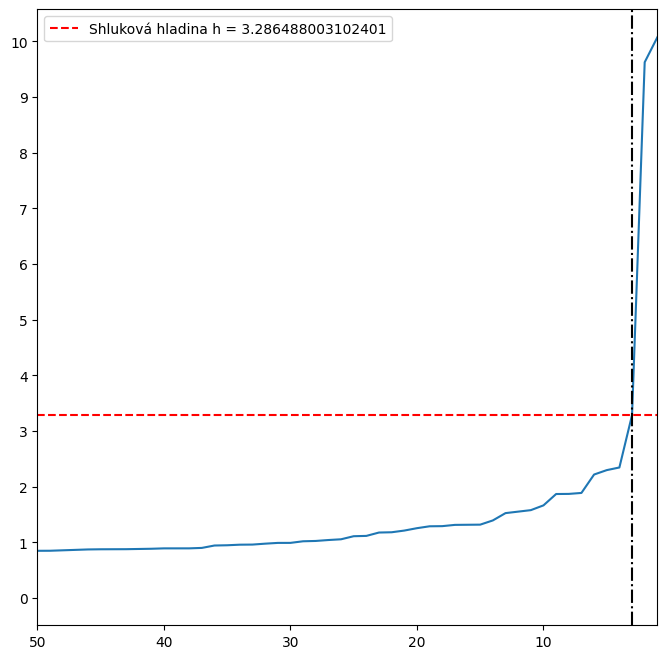

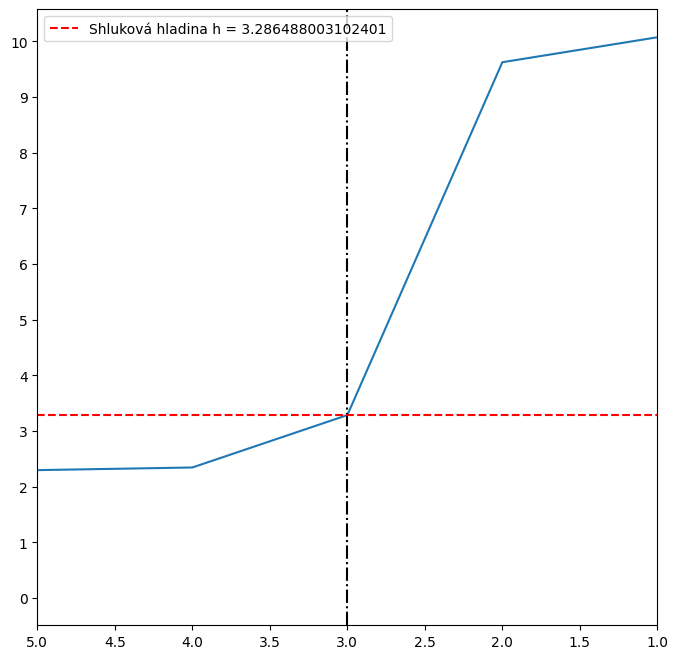

Počet shluků odhadnut metodou shlukové hladiny:  3


<Figure size 800x800 with 0 Axes>

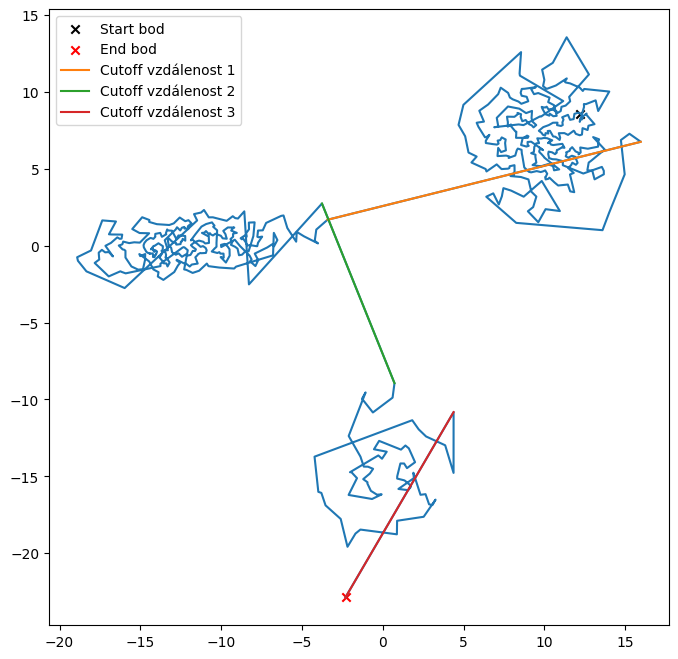

Počet shluků odhadnut metodou řetězové mapy:  4


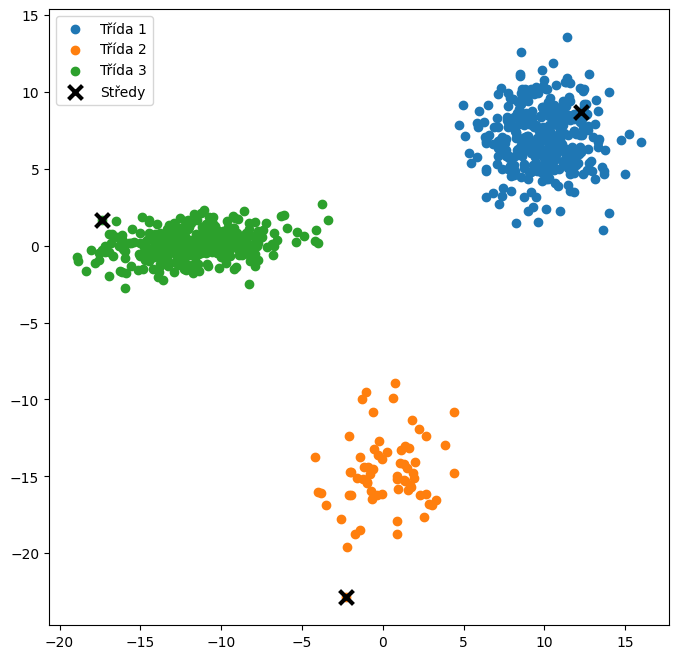

Počet shluků odhadnut metodou maximin:  3
Počet shluků všech metod se liší. Je třeba zkusit jiný cutoff_dist, či změnit počáteční bod metody řetězové mapy.


In [15]:
#Výpočet počtů shluků a ploty výsledků
amount_of_classes_agg = agg_plot_and_get_clusters(data)
print("Počet shluků odhadnut metodou shlukové hladiny: ", amount_of_classes_agg)

cutoff_dist = np.mean(dm) * len(dm) / 1200
amount_of_classes_div = div_plot_get_clusters(data, 0, cutoff_dist)
print("Počet shluků odhadnut metodou řetězové mapy: ", amount_of_classes_div)

cutoff = np.mean(dm) * 1.5
amount_of_classes_mm = mm_plot_and_get_clusters(data, cutoff)
print("Počet shluků odhadnut metodou maximin: ", amount_of_classes_mm)

#Test shodnosti výsledků všech metod
if amount_of_classes_agg == amount_of_classes_div == amount_of_classes_mm:
    print("Počty shluků všech metod se shodují. Počet shluků je:", amount_of_classes_agg)
else:
    print("Počet shluků všech metod se liší. Je třeba zkusit jiný cutoff_dist, či změnit počáteční bod metody řetězové mapy.")